In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mean_0 = [0,1]
mean_1 = [3,4]

cov_0 = [[1.2,0.2],[0.2,0.6]]
cov_1 = [[1.2,0.5],[0.5,0.8]]

dist_0 = np.random.multivariate_normal(mean_0 , cov_0 , 500)
dist_1 = np.random.multivariate_normal(mean_1 , cov_1 , 500)
print(dist_0.shape , dist_1.shape)

(500, 2) (500, 2)


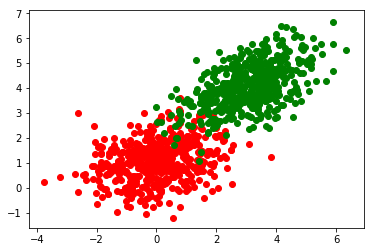

In [3]:
plt.figure()
plt.scatter(dist_0[: , 0] , dist_0[: , 1] , color = 'red')
plt.scatter(dist_1[: , 0] , dist_1[: , 1] , color = 'green')
plt.show()

In [4]:
dataset = np.zeros((dist_0.shape[0]+dist_1.shape[0] , dist_0.shape[1]+1))
print(dataset.shape)

dataset[:dist_0.shape[0] , :-1] = dist_0
dataset[dist_0.shape[0]: , :-1] = dist_1
dataset[:dist_0.shape[0] , -1] = 0
dataset[dist_0.shape[0]: , -1] = 1

print(dataset[:10])
print('-'*20)
np.random.shuffle(dataset)
print(dataset[:10])

(1000, 3)
[[ 0.2668271   0.24486358  0.        ]
 [-0.0671501   0.90911041  0.        ]
 [ 0.13892913  2.70957963  0.        ]
 [ 0.17853496  2.04106804  0.        ]
 [ 0.57105626  0.44839309  0.        ]
 [ 2.01320931  1.506804    0.        ]
 [ 0.15902993  1.18726135  0.        ]
 [ 1.23202595  1.85553215  0.        ]
 [ 0.18119154  0.76926798  0.        ]
 [-1.75394798  1.94405201  0.        ]]
--------------------
[[ 3.58144767  4.13445095  1.        ]
 [-0.54123178  1.05318922  0.        ]
 [ 2.05244149  3.95129204  1.        ]
 [ 2.70334187  4.90212581  1.        ]
 [ 1.26639959  2.42063737  0.        ]
 [ 2.31068972  3.71847641  1.        ]
 [ 0.01771193  2.64753395  1.        ]
 [-0.60690052  1.3850052   0.        ]
 [-0.9627831   0.54539742  0.        ]
 [ 3.96464473  4.15951014  1.        ]]


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train , X_test , Y_train , Y_test = train_test_split(dataset[: ,  :-1] , dataset[: , -1] , test_size= 0.2)

In [7]:
print(X_train.shape , X_test.shape)
print(Y_train.shape , Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [8]:
class Logistic_Regression:
    def __init__(self,x,y,dist_0,dist_1):
        self.x = x
        self.y = y
        self.dist_1 = dist_1
        self.dist_0 = dist_0
        self.coef = np.random.uniform(low=-1 , high=1 , size=(x.shape[1],))
        self.bias = np.random.random()
        
    def sigmoid(self , z):
        sig = 1/(1+np.exp(-z))
        return sig
    def hypothesis(self,x):
        z = self.coef.dot(x)+self.bias
        return self.sigmoid(z)
    def compute_loss(self):
        log_likelihood = 0
        for x,y in zip(self.x , self.y):
            yhat = self.hypothesis(x)
            log_likelihood+= y*np.log(yhat+1e-3)+(1-y)*np.log(1-yhat+1e-3)
            
        neg_log_likelihood = -1*log_likelihood
        return neg_log_likelihood
        
    def apply_gradient_descent(self , learning_rate = 0.01):
        theta0 = 0
        gradients = np.zeros_like(self.coef)
        
        #compute gradients
        for x,y in zip(self.x , self.y):
            yhat = self.hypothesis(x)
            theta0+=(yhat-y)
            gradients+=((yhat-y)*x)
            
        # update weights
        self.coef = self.coef - (learning_rate*gradients)
        self.bias = self.bias - (learning_rate*theta0)
    def run(self,losses , iterations , learning_rate=0.01):
        for i in range(iterations):
            self.apply_gradient_descent(learning_rate)
            losses.append(self.compute_loss())
            self.draw_decision_boundary(i)
            print("loss in {} th iteration is :-{}".format(i,losses[i]))
        return losses
    
    def draw_decision_boundary(self,i):
        plt.scatter(dist_0[:,0],dist_0[:,1],c='red')
        plt.scatter(dist_1[:,0],dist_1[:,1],c='green')
        x=np.array([6,-2])
        y=-(self.bias+self.coef[0]*x)/self.coef[1]
        plt.plot(x,y,c='black')
        plt.title("Plot of {} th iteration".format(i))
        plt.show()
    def predict(self,x):
        hx = self.hypothesis(x)
        if hx>=0.5:
            return 1
        else:
            return 0
    def accuracy(self , test , label):
        predictions = []
        for x in test:
            preds = self.predict(x)
            predictions.append(preds)
            
        accuracy = (predictions==label).sum()/test.shape[0]
        return accuracy

In [9]:
logistic_reg=Logistic_Regression(X_train,Y_train,dist_0 , dist_1)
print("theta0 : ",logistic_reg.bias)
print("remaining_theta: ",logistic_reg.coef)

theta0 :  0.3938566588790594
remaining_theta:  [ 0.42408683 -0.41269505]


In [10]:
losses=[]
initial_loss=logistic_reg.compute_loss()
losses.append(initial_loss)
print(losses)

[567.8268698730782]


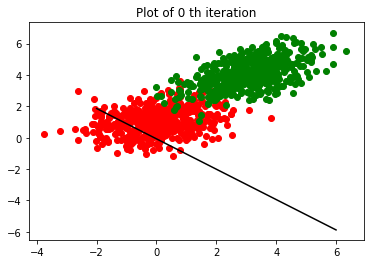

loss in 0 th iteration is :-567.8268698730782


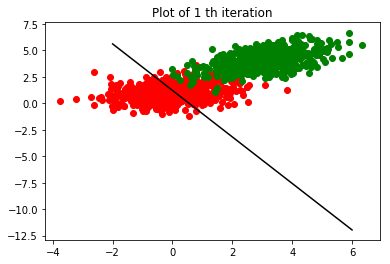

loss in 1 th iteration is :-1756.2361057318515


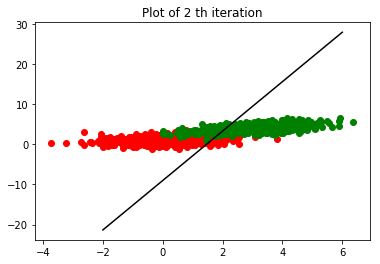

loss in 2 th iteration is :-757.3250326748799


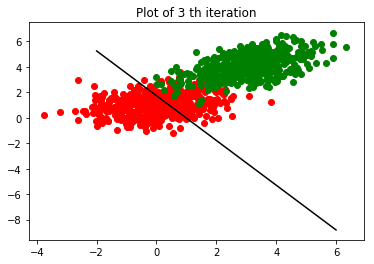

loss in 3 th iteration is :-253.0732790165134


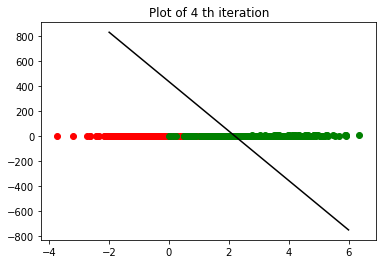

loss in 4 th iteration is :-543.4589170091921


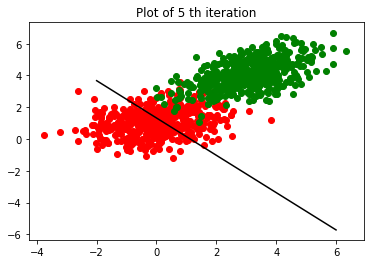

loss in 5 th iteration is :-238.5207540519117


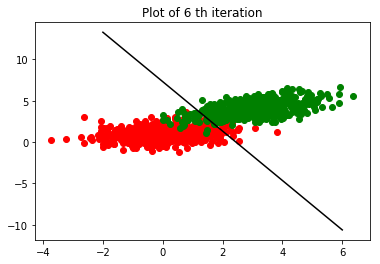

loss in 6 th iteration is :-676.3128840799615


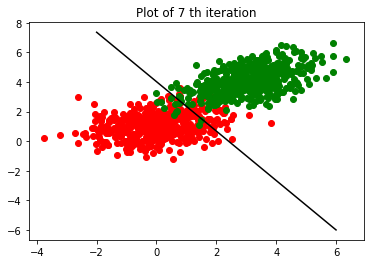

loss in 7 th iteration is :-113.07366004152561


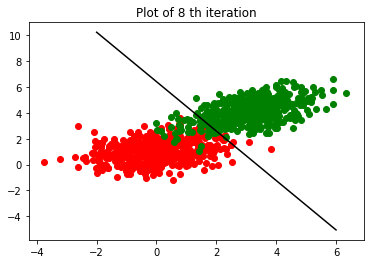

loss in 8 th iteration is :-113.95865655237196


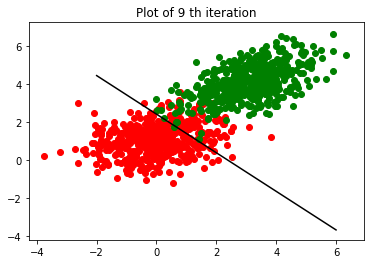

loss in 9 th iteration is :-120.89408142040706


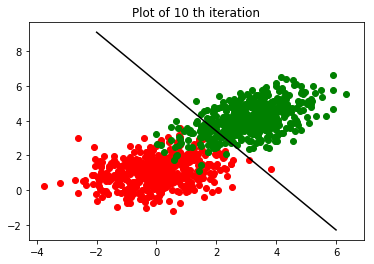

loss in 10 th iteration is :-218.50229885083687


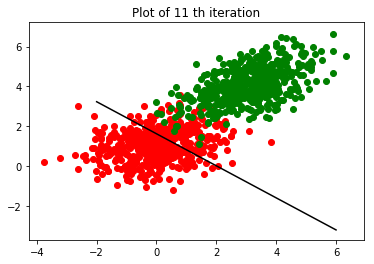

loss in 11 th iteration is :-163.79314636678956


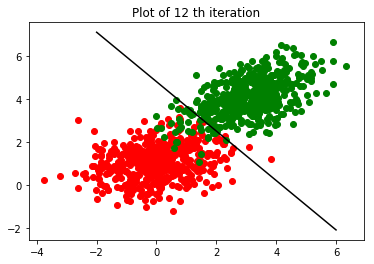

loss in 12 th iteration is :-460.80454065417825


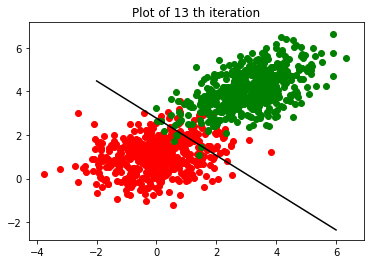

loss in 13 th iteration is :-94.87717827499425


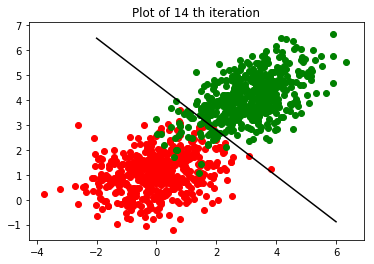

loss in 14 th iteration is :-127.02767402462455


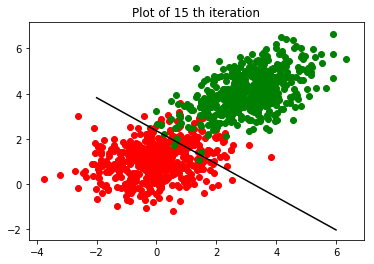

loss in 15 th iteration is :-105.06378704461524


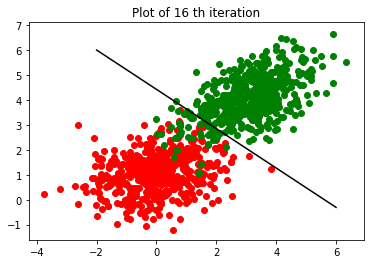

loss in 16 th iteration is :-177.6060739459228


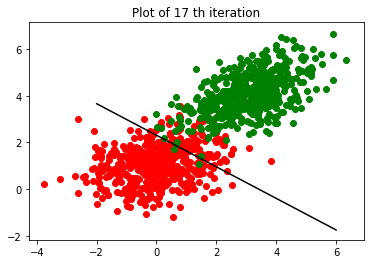

loss in 17 th iteration is :-105.03495709032418


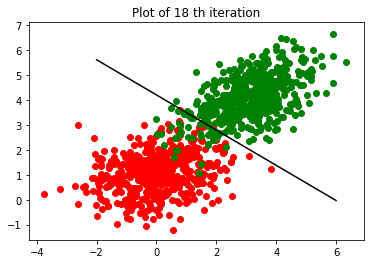

loss in 18 th iteration is :-179.7512349917121


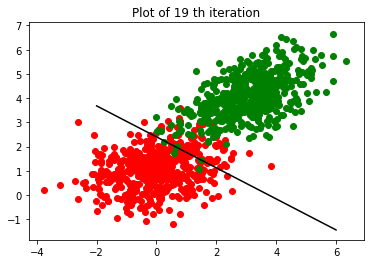

loss in 19 th iteration is :-97.70082462606501


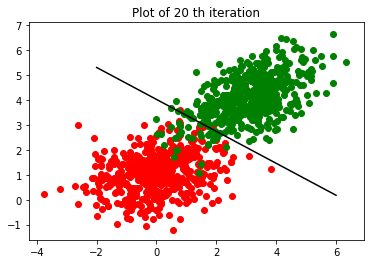

loss in 20 th iteration is :-151.58755798913114


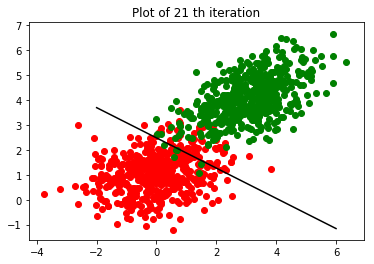

loss in 21 th iteration is :-91.63637945182467


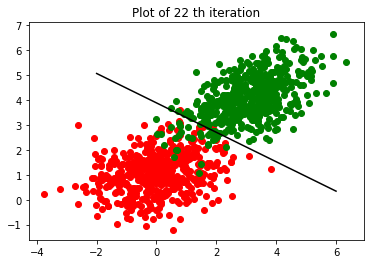

loss in 22 th iteration is :-130.9048825150559


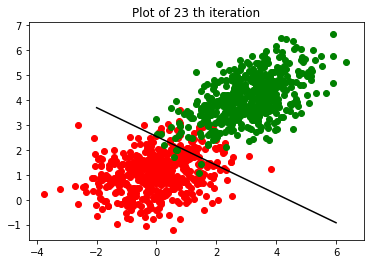

loss in 23 th iteration is :-86.99937920121118


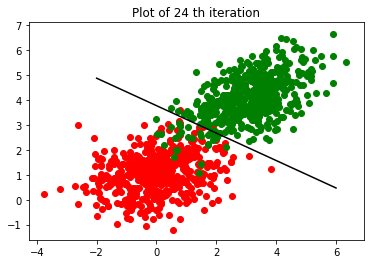

loss in 24 th iteration is :-116.52630502125506


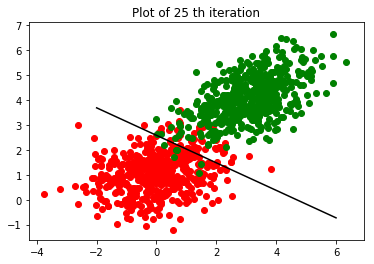

loss in 25 th iteration is :-83.40074844592834


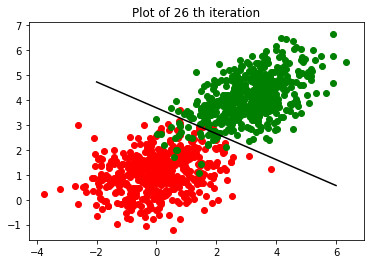

loss in 26 th iteration is :-106.15351849556673


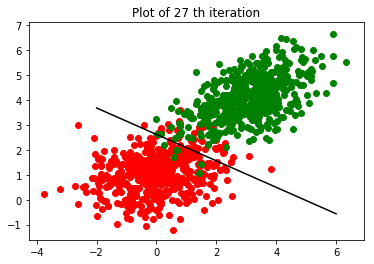

loss in 27 th iteration is :-80.52728798628084


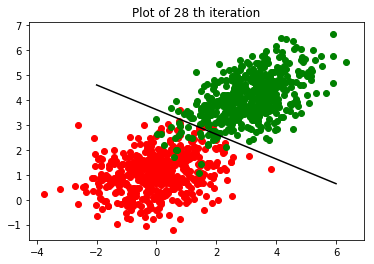

loss in 28 th iteration is :-98.34924191955966


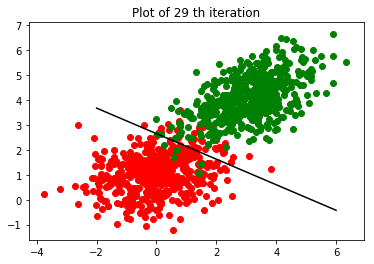

loss in 29 th iteration is :-78.16237171016228


[567.8268698730782,
 1756.2361057318515,
 757.3250326748799,
 253.0732790165134,
 543.4589170091921,
 238.5207540519117,
 676.3128840799615,
 113.07366004152561,
 113.95865655237196,
 120.89408142040706,
 218.50229885083687,
 163.79314636678956,
 460.80454065417825,
 94.87717827499425,
 127.02767402462455,
 105.06378704461524,
 177.6060739459228,
 105.03495709032418,
 179.7512349917121,
 97.70082462606501,
 151.58755798913114,
 91.63637945182467,
 130.9048825150559,
 86.99937920121118,
 116.52630502125506,
 83.40074844592834,
 106.15351849556673,
 80.52728798628084,
 98.34924191955966,
 78.16237171016228,
 92.2550310229861]

In [11]:
logistic_reg.run(losses,30,0.01)

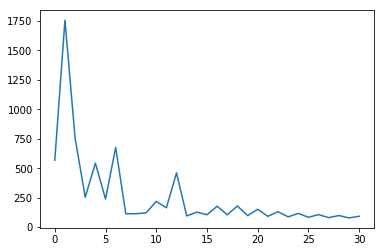

In [12]:
plt.plot(losses)
plt.show()

In [13]:
print(logistic_reg.accuracy(X_test,Y_test))

0.94


In [14]:
print("theta0 : ",logistic_reg.bias)
print("remaining_theta: ",logistic_reg.coef)

theta0 :  -8.443743855027664
remaining_theta:  [1.63222131 3.18662025]


# SKLearn

In [15]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression(penalty=)

NameError: name 'none' is not defined

In [32]:
lr.fit(X_train , Y_train)

c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
lr.score(X_test,Y_test)

0.975

In [29]:
lr.coef_

array([[1.14051589, 2.87115076]])

In [30]:
lr.intercept_

array([-8.73102248])